In [2]:
import pandas as pd
from get_sentiment import *
import nltk
import spacy
from spacy.tokens import Doc
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dizquierdo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [374]:
results = primary_species(['Candidate', 'Tweet'], 'text', 'timestamp')

data = read_cypher(results, index_col='timestamp')

In [111]:
sentiment_analyzer = SentimentIntensityAnalyzer()
def sentiment(doc):
    """Returns polarity score set earlier to Vader's analyzer"""
    return sentiment_analyzer.polarity_scores(doc)['compound']

In [112]:
len(data)

464

In [375]:
data.name.value_counts()

BernieSanders    157
PeteButtigieg    110
MikeBloomberg     95
amyklobuchar      89
JoeBiden          78
AndrewYang        35
TulsiGabbard      18
Name: name, dtype: int64

In [376]:
data['clean_text'], data['hashtag'] = zip(*data.text.map(strip_tweets))

In [377]:
data = pd.merge(data, pd.get_dummies(data.hashtag.apply(pd.Series).stack()).sum(level=0), how='left', left_index=True, right_index=True).drop(['hashtag','followers'], axis=1).fillna(0)


In [378]:
data.iloc[357][['clean_text']][0]

"MAYOR'S NIGHT OUT "

In [379]:
data['sentiment'] = data.text.apply(sentiment)

In [380]:
data.iloc[0]['timestamp']

1582772385.0

In [381]:
data.head()

,name,text,timestamp,clean_text,#1,#BloombergGBF,#CNNTownHall,#CNNTownhall,#CoronavirusUSA,#DemDebate,...,#StandWithTulsi,#SuperBowl,#TULSI2020,#TeamPete,#danggang,#sb150,#southbend,#stuffmayorsdo,#yanggang,sentiment
0,BernieSanders,"Trump called the press the ""enemy of the peopl...",1.582772e+09,"Trump called the press the ""enemy of the peopl...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5423
1,BernieSanders,"I first met John a few months ago, in what was...",1.576050e+09,"I first met John a few months ago, in what was...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414
2,BernieSanders,Cardi B's nails are juuuust a little different...,1.565898e+09,Cardi B's nails are juuuust a little different...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4939
3,BernieSanders,"We need a vaccine that is available to all, no...",1.582782e+09,"We need a vaccine that is available to all, no...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3818
4,BernieSanders,When Donald Trump stays silent in the face of ...,1.569174e+09,When Donald Trump stays silent in the face of ...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8658


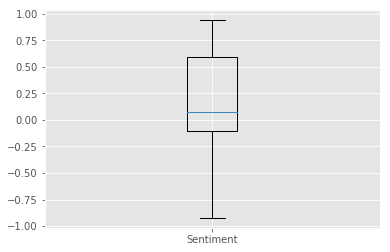

In [382]:
plt.boxplot(data.sentiment, labels=['Sentiment']);

In [383]:
data.groupby(by='name').sentiment.mean()

name
AndrewYang       0.270754
BernieSanders    0.151487
JoeBiden         0.126854
MikeBloomberg    0.024555
PeteButtigieg    0.166886
TulsiGabbard     0.161878
amyklobuchar     0.255792
Name: sentiment, dtype: float64

In [384]:
data.set_index(pd.to_datetime(data.timestamp, utc=True, unit='s'), inplace=True)
data['day'] = data.index.day

In [385]:
data.drop(['timestamp'], axis=1, inplace=True)

In [386]:
data.head()

,name,text,clean_text,#1,#BloombergGBF,#CNNTownHall,#CNNTownhall,#CoronavirusUSA,#DemDebate,#HumanityFirst,...,#StandWithTulsi,#SuperBowl,#TULSI2020,#TeamPete,#danggang,#sb150,#southbend,#stuffmayorsdo,#yanggang,sentiment
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-27 02:59:45+00:00,BernieSanders,"Trump called the press the ""enemy of the peopl...","Trump called the press the ""enemy of the peopl...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5423
2019-12-11 07:44:48+00:00,BernieSanders,"I first met John a few months ago, in what was...","I first met John a few months ago, in what was...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414
2019-08-15 19:46:12+00:00,BernieSanders,Cardi B's nails are juuuust a little different...,Cardi B's nails are juuuust a little different...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4939
2020-02-27 05:36:59+00:00,BernieSanders,"We need a vaccine that is available to all, no...","We need a vaccine that is available to all, no...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3818
2019-09-22 17:32:57+00:00,BernieSanders,When Donald Trump stays silent in the face of ...,When Donald Trump stays silent in the face of ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8658


In [387]:
set(data.name.values)

{'AndrewYang',
 'BernieSanders',
 'JoeBiden',
 'MikeBloomberg',
 'PeteButtigieg',
 'TulsiGabbard',
 'amyklobuchar'}

In [394]:
data.query('name=="BernieSanders"').tail()

,name,text,clean_text,#1,#BloombergGBF,#CNNTownHall,#CNNTownhall,#CoronavirusUSA,#DemDebate,#HumanityFirst,...,#SuperBowl,#TULSI2020,#TeamPete,#danggang,#sb150,#southbend,#stuffmayorsdo,#yanggang,sentiment,day
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-26 07:14:55+00:00,BernieSanders,We are going to legalize marijuana on day one ...,We are going to legalize marijuana on day one ...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,26
2020-02-26 08:13:30+00:00,BernieSanders,My opponents would like you to think the ideas...,My opponents would like you to think the ideas...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3612,26
2020-02-26 21:13:33+00:00,BernieSanders,If we bring together working people everywhere...,If we bring together working people everywhere...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6124,26
2020-02-26 07:44:36+00:00,BernieSanders,"""I said this to President Castro in Cuba. Look...","""I said this to President Castro in Cuba. Look...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7845,26
2020-02-26 05:55:30+00:00,BernieSanders,Looking forward to hearing more enthusiastic s...,Looking forward to hearing more enthusiastic s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7559,26


In [396]:
data.index.max()

Timestamp('2020-02-29 06:48:02+0000', tz='UTC')

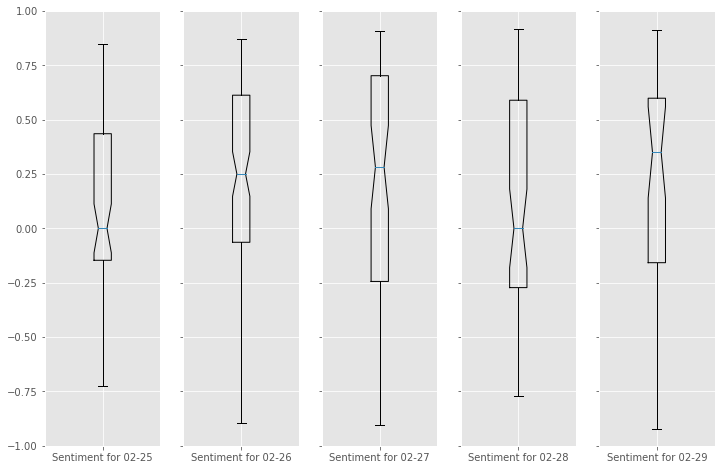

In [391]:
days = set(data['2020-02-25':'2020-03-03'].day.values)
fig, ax = plt.subplots(1,len(days), figsize=(12,8), sharey=True)
for count, day in enumerate(days):
    subset = data['2020-02-25':'2020-03-03'].query(f'day =={day}')
    ax[count].boxplot(subset.sentiment, notch=True, labels=[f'Sentiment for 02-{day}'])
    axes = plt.gca()
    axes.set_ylim([-1,1])
#     axes.set_yticklabels(map(lambda x: x/10, list(range(-10,10))))

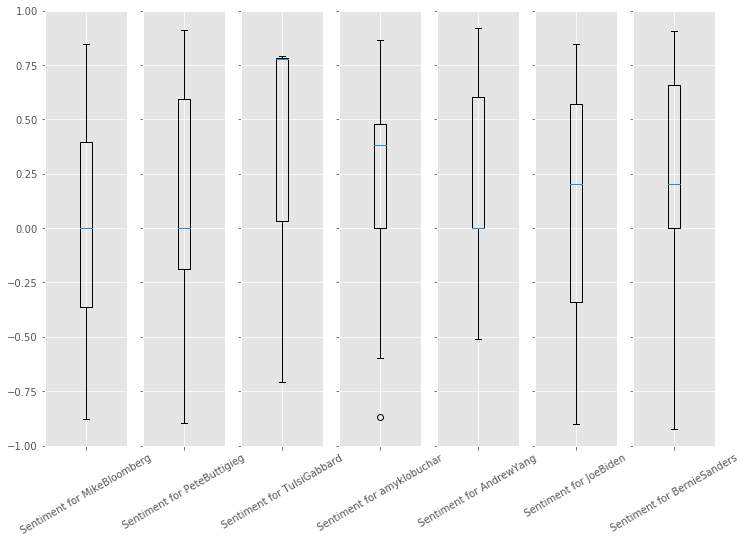

In [148]:
candidates = set(data['2020-02-25':'2020-02-29'].name.values)
fig, ax = plt.subplots(1,len(candidates), figsize=(12,8), sharey=True)
for count, candidate in enumerate(candidates):
    subset = data['2020-02-25':'2020-02-29'].query(f'name=="{candidate}"')
    ax[count].boxplot(subset.sentiment, notch=False, labels=[f'Sentiment for {candidate}'])
    axes = plt.gca()
    axes.set_ylim([-1,1])
    for tick in ax[count].get_xticklabels():
        tick.set_rotation(30)
#     axes.set_yticklabels(map(lambda x: x/10, list(range(-10,10))))

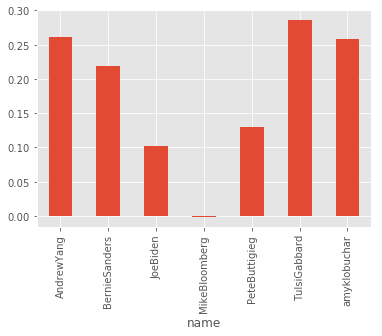

In [150]:
candidate_mean = data['2020-02-25':'2020-02-29'].groupby('name').sentiment.mean()
candidate_mean.plot(kind='bar');

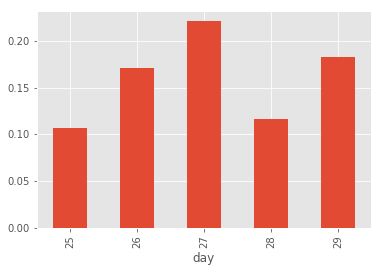

In [153]:
day_mean = data['2020-02-25':'2020-02-29'].groupby('day').sentiment.mean()
day_mean.plot(kind='bar');

In [176]:
min_sent_tweet

'No patient should be sued, go into debt or go bankrupt for the "crime" of getting sick. We must remove the greed fr… https://t.co/s1XaPQ1Cc2'

In [192]:
data.sentiment.max()

0.9392

In [195]:
data.query('name == "JoeBiden"').sentiment.max()

0.9392

In [198]:
data[(data['sentiment'] == max_sentiment)].values

array([['JoeBiden',
        "A giant among men, a civil rights hero, and a man I'm honored to call a friend — Happy Birthday, Congressman Lewis!… https://t.co/vypBc8B6X9",
        "A giant among men, a civil rights hero, and a man I'm honored to call a friend — Happy Birthday, Congressman Lewis!… ",
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.9392, 22]], dtype=object)

In [200]:
data.query(f'sentiment== {max_sentiment}')

,name,text,clean_text,#1,#BloombergGBF,#CNNTownHall,#DemDebate,#LetYangSpeak,#PayToPlay,#StandWithTulsi,#SuperBowl,#TULSI2020,#TeamPete,#danggang,#sb150,#southbend,#stuffmayorsdo,#yanggang,sentiment,day
timestamp,,,,,,,,,,,,,,,,,,,,
2020-02-22 01:07:56+00:00,JoeBiden,"A giant among men, a civil rights hero, and a ...","A giant among men, a civil rights hero, and a ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9392,22


In [264]:
tick = g.yaxis.get_major_ticks()[1]

In [265]:
tick.label

Text(0,1,'MikeBloomberg')

In [266]:
tick.label1.get_text()

'MikeBloomberg'

In [267]:
tick.get_loc()

1

In [274]:
tick.label.get_position()[1]

1

In [299]:
[print(tick.label) for tick in g.yaxis.get_major_ticks()]

Text(0,0,'BernieSanders')
Text(0,1,'MikeBloomberg')
Text(0,2,'JoeBiden')
Text(0,3,'PeteButtigieg')
Text(0,4,'amyklobuchar')
Text(0,5,'AndrewYang')
Text(0,6,'TulsiGabbard')


[None, None, None, None, None, None, None]

In [309]:
g.yaxis.axis_name

'y'

In [310]:
max_sent_y

0

In [311]:
min_sent_y

0

In [368]:
data[(data['sentiment'] == min_sentiment)]['clean_text'].values[0]

'No patient should be sued, go into debt or go bankrupt for the "crime" of getting sick. We must remove the greed fr… '

In [364]:
data[(data['sentiment'] == min_sentiment)]['text'].values[0]

'No patient should be sued, go into debt or go bankrupt for the "crime" of getting sick. We must remove the greed fr… https://t.co/s1XaPQ1Cc2'

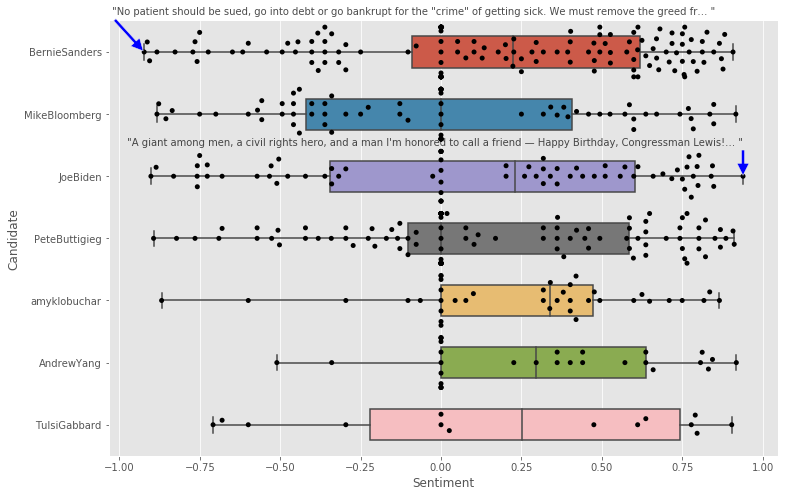

In [371]:
max_sentiment = data.sentiment.max()
min_sentiment = data.sentiment.min()
max_sent_tweet = data[(data['sentiment'] == max_sentiment)]['clean_text'].values[0]
min_sent_tweet = data[(data['sentiment'] == min_sentiment)]['clean_text'].values[0]
max_sent_sender = data[(data['sentiment'] == max_sentiment)]['name'].values[0]
min_sent_sender = data[(data['sentiment'] == min_sentiment)]['name'].values[0]
g = sns.boxplot(y = "name",
              x = 'sentiment', 
              data = data, whis=np.inf, width=.5)
g = sns.swarmplot(y = "name",
              x = 'sentiment', 
              data = data,
              size = 5,color='black')
plt.ylabel('Candidate')
plt.xlabel('Sentiment')
# remove the top and right line in graph
sns.despine()
# Annotate. xy for coordinate. max_wage is x and 0 is y. In this plot y ranges from 0 to 7 for each level
# xytext for coordinates of where I want to put my text
for count, tick in enumerate(g.yaxis.get_major_ticks()):
    if max_sent_sender == tick.label.get_text():
        max_sent_y = count
    if min_sent_sender == tick.label.get_text():
        min_sent_y = count
plt.annotate(s = '"'+max_sent_tweet+'"',
             xy = (max_sentiment,max_sent_y),
             xytext = (max_sentiment,max_sent_y-.5), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'blue', 'width': 3, 'shrink': 0.03},
             ha='right',
             alpha=.7)
plt.annotate(s = '"'+min_sent_tweet+'"',
             xy = (min_sentiment,min_sent_y),
             xytext = (min_sentiment-.1,min_sent_y-.6), 
             # Shrink the arrow to avoid occlusion
             arrowprops = {'facecolor':'blue', 'width': 3, 'shrink': 0.03},
             horizontalalignment='left',
             alpha=.7)
g.figure.set_size_inches(12,8)
plt.show();

In [372]:
data.head()

,name,text,clean_text,#1,#BloombergGBF,#CNNTownHall,#DemDebate,#LetYangSpeak,#PayToPlay,#StandWithTulsi,#SuperBowl,#TULSI2020,#TeamPete,#danggang,#sb150,#southbend,#stuffmayorsdo,#yanggang,sentiment,day
timestamp,,,,,,,,,,,,,,,,,,,,
2019-06-12 22:46:20+00:00,BernieSanders,"In 1944, FDR proposed an economic bill of righ...","In 1944, FDR proposed an economic bill of righ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.7586,12
2019-06-12 19:40:00+00:00,BernieSanders,75 years after FDR proposed an economic bill o...,75 years after FDR proposed an economic bill o...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,12
2019-09-15 02:01:03+00:00,BernieSanders,Housing must be a right. We will:\n\n✅Build an...,Housing must be a right. We will:\n\n✅Build an...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,15
2015-12-24 07:01:02+00:00,BernieSanders,"You want to keep the minimum wage low, and giv...","You want to keep the minimum wage low, and giv...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5106,24
2020-02-29 01:37:22+00:00,BernieSanders,"No patient should be sued, go into debt or go ...","No patient should be sued, go into debt or go ...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.9231,29


In [397]:
data.resample()

,name,text,clean_text,#1,#BloombergGBF,#CNNTownHall,#CNNTownhall,#CoronavirusUSA,#DemDebate,#HumanityFirst,...,#SuperBowl,#TULSI2020,#TeamPete,#danggang,#sb150,#southbend,#stuffmayorsdo,#yanggang,sentiment,day
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-27 02:59:45+00:00,BernieSanders,"Trump called the press the ""enemy of the peopl...","Trump called the press the ""enemy of the peopl...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5423,27
2019-12-11 07:44:48+00:00,BernieSanders,"I first met John a few months ago, in what was...","I first met John a few months ago, in what was...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5414,11
2019-08-15 19:46:12+00:00,BernieSanders,Cardi B's nails are juuuust a little different...,Cardi B's nails are juuuust a little different...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4939,15
2020-02-27 05:36:59+00:00,BernieSanders,"We need a vaccine that is available to all, no...","We need a vaccine that is available to all, no...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3818,27
2019-09-22 17:32:57+00:00,BernieSanders,When Donald Trump stays silent in the face of ...,When Donald Trump stays silent in the face of ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.8658,22


In [ ]:
import numpy as np
# Compute areas and colors
N = 150
data['theta'] = data.index 2 * np.pi * np.random.rand(N)

In [398]:
r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

In [447]:
data.index.hour *3600

Int64Index([ 7200, 25200, 68400, 18000, 61200, 18000, 18000, 72000, 21600,
            72000,
            ...
            64800, 28800, 25200, 64800, 64800, 61200, 61200,  7200,  7200,
             7200],
           dtype='int64', name='timestamp', length=582)

In [440]:
np.timedelta64(data.index.time)/np.timedelta64(1,'D')

ValueError: Could not convert object to NumPy timedelta

In [454]:
max(winter_time(data.index))

6.270895280363461

In [453]:
2*np.pi

6.283185307179586

In [448]:
def winter_time(t_index):
    """Convert DateTime to equivalent polar coordinate 0=Midnight, Pi=Noon. Vectorize if possible."""
    #Code from Andrew giving decimal of datetime
    since_midnight = t_index.hour * 3600 + t_index.minute * 60 + t_index.second
    polar_time = np.pi*2*since_midnight /60/60/24
    return polar_time

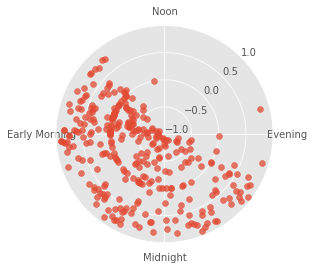

In [459]:
subset = data['2020-02-25':'2020-02-29']
fig = plt.figure()
r = subset.sentiment
theta = winter_time(subset.index)
ax = fig.add_subplot(111, polar=True)
ax.set_rorigin(-1)
ax.set_rlim(-1,1)
# ax.set_rgrids([-1,0,1])
ax.set_theta_zero_location('S')
ax.set_rticks([-1,-.5,0,.5,1])
ax.set_theta_direction(-1)
ax.set_rlabel_position(225)
ax.set_thetagrids(angles = [0,90,180,270],
                  labels = ('Midnight', 'Early Morning', 'Noon', 'Evening'))
c = ax.scatter(theta, r, alpha=0.75)

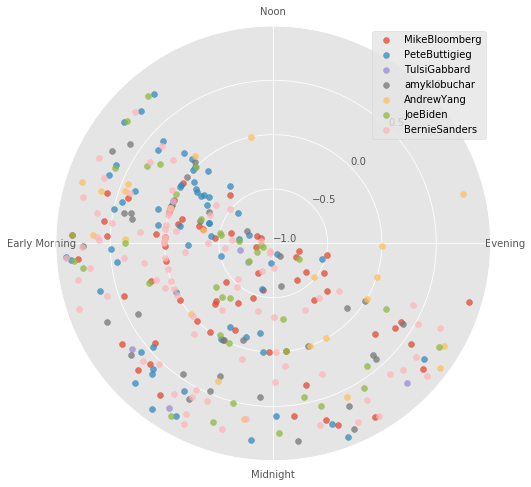

In [475]:
candidates = set(data['2020-02-25':'2020-03-03'].name.values)
fig, axes = plt.subplots(1,len(candidates), figsize=(12,8))
for count, candidate in enumerate(candidates):
    subset = data['2020-02-25':'2020-03-03'].query(f'name=="{candidate}"')
    fig = plt.subplot(polar=True)
    r = subset.sentiment
    theta = winter_time(subset.index)
    ax = plt.gca()
#     ax=axes[count]
#     ax = fig.add_subplot(110+count+1, polar=True)
    ax.set_rorigin(-1)
    ax.set_rlim(-1,1)
    # ax.set_rgrids([-1,0,1])
    ax.set_theta_zero_location('S')
    ax.set_rticks([-1,-.5,0,.5,1])
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(225)
    ax.set_thetagrids(angles = [0,90,180,270],
                      labels = ('Midnight', 'Early Morning', 'Noon', 'Evening'))
    c = ax.scatter(theta, r, alpha=0.75)
    plt.legend(candidates)

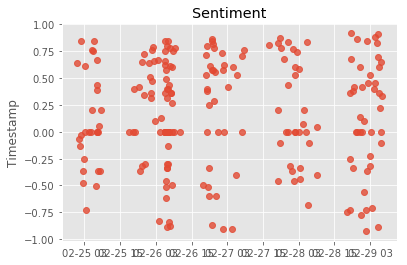

In [34]:
fig, ax = plt.subplots()
ax.plot(data.loc['2020-02-25':'2020-02-29', 'sentiment'], marker='o', alpha=.8, linestyle='None')
ax.set_ylabel('Timestamp')
ax.set_title('Sentiment');

In [39]:
data['day'] = data.index.day
# ax = plt.boxplot(data = data, x='Day',y='Sentiment')
# for item in ax.get_xticklabels():
#     item.set_rotation(90)

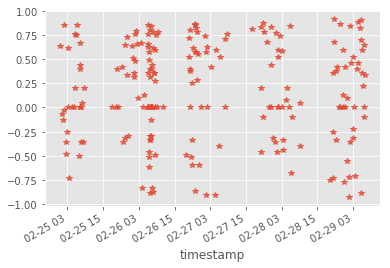

In [27]:
data.loc['2020-02-25':'2020-02-29', 'sentiment'].plot(marker='*', alpha=0.8, linestyle='None')

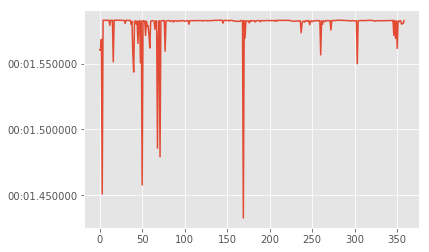

In [97]:
plt.plot(data.index)

In [5]:
tag_set.most_common(5)

[('#auspol', 359),
 ('#Australia', 350),
 ('#ClimateCrisis', 290),
 ('#ClimateActionNow', 271),
 ('#straya', 257)]

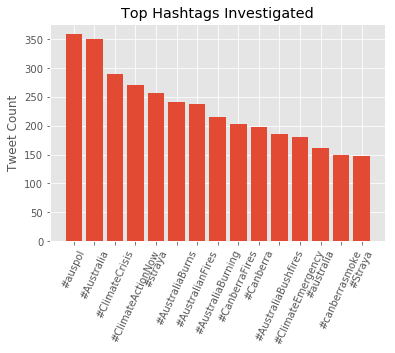

In [6]:
plt.bar([tag[0] for tag in tag_set.most_common(15)], [tag[1] for tag in tag_set.most_common(15)])
plt.xticks(rotation=65)
plt.ylabel('Tweet Count')
plt.title('Top Hashtags Investigated')
plt.show;

In [7]:
word_count = Counter(" ".join([re.sub(r'\s',' ',tweet[0]).strip() for tweet in clean_tweets]).split())

In [8]:
word_count.most_common(10)

[('the', 2174),
 ('to', 1612),
 ('of', 1041),
 ('a', 985),
 ('in', 966),
 ('and', 962),
 ('is', 721),
 ('for', 681),
 ('on', 452),
 ('this', 380)]

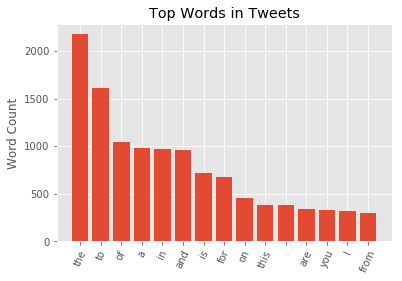

In [9]:
plt.bar([word[0] for word in word_count.most_common(15)], [word[1] for word in word_count.most_common(15)])
plt.xticks(rotation=65)
plt.ylabel('Word Count')
plt.title('Top Words in Tweets')
plt.show();

In [10]:
stopwords_list=stopwords.words('english') +list(string.punctuation)
stopwords_list += ["&amp;","'",'"','...','``','…','’','‘','“',"''",'""','”','”','co',"'s'",'\'s','n\'t','\'m','\'re','amp','https']
    

In [14]:
tweets = [tweet[0] for tweet in clean_tweets]

In [15]:
wordfrequency(tweets, 20)

[('fire', 303),
 ('australia', 266),
 ('day', 224),
 ('climate', 150),
 ('australian', 146),
 ('de', 134),
 ('like', 133),
 ('people', 129),
 ('time', 128),
 ('u', 123),
 ('need', 117),
 ('one', 113),
 ('get', 108),
 ('help', 107),
 ('change', 106),
 ('canberra', 96),
 ('see', 94),
 ('go', 93),
 ('new', 90),
 ('still', 90)]

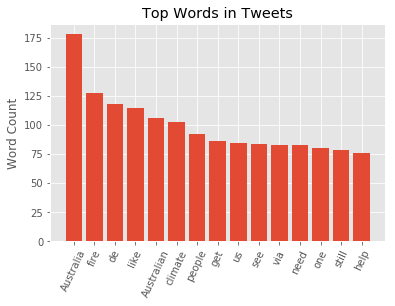

In [11]:
plt.bar([word[0] for word in word_count.most_common(100) if word[0].lower() not in stopwords_list][:15], [word[1] for word in word_count.most_common(100) if word[0].lower() not in stopwords_list][:15])
plt.xticks(rotation=65)
plt.ylabel('Word Count')
plt.title('Top Words in Tweets')
plt.show;

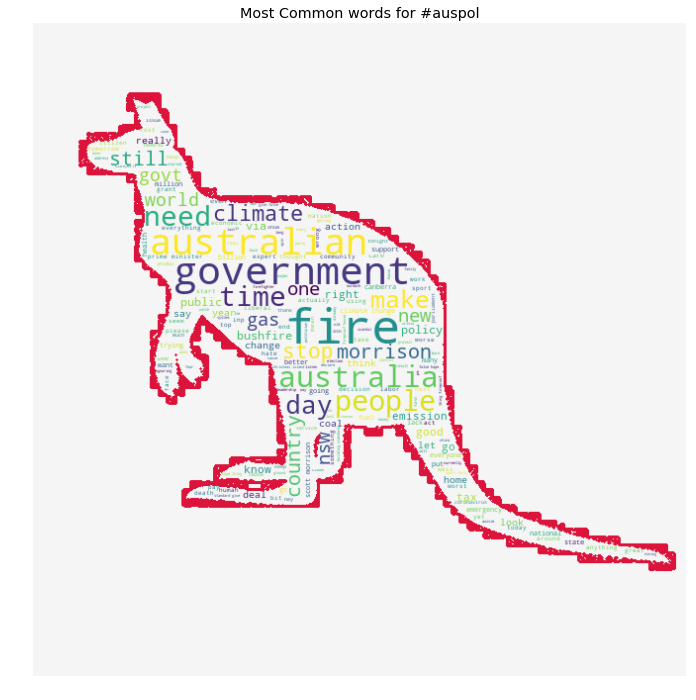

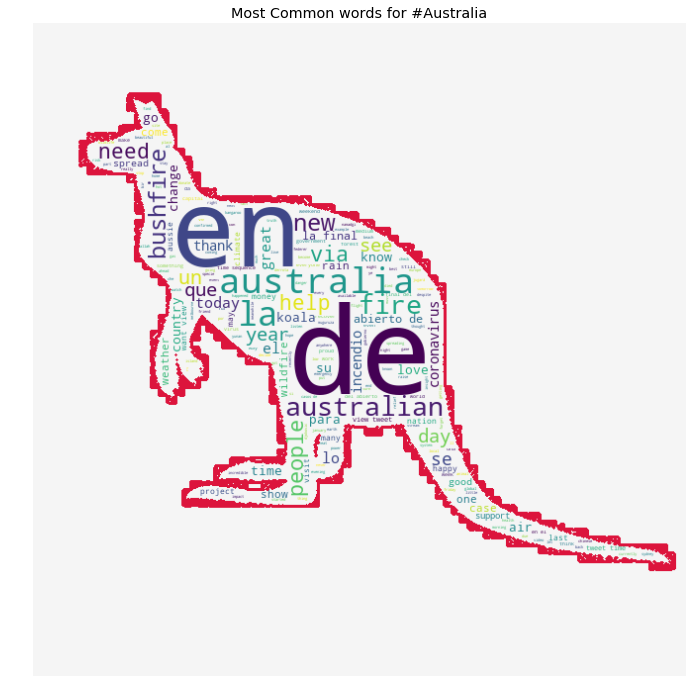

TypeError: sequence item 3550: expected str instance, tuple found

In [12]:
for tag in tag_set.most_common(5):
    subset = list(filter(lambda x: tag[0] in x[1], clean_tweets))
    create_wordcloud([tweet[0] for tweet in subset] , tag[0], 200)

In [5]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

In [15]:
from nltk.collocations import BigramCollocationFinder as big_find

In [36]:
tweets = [tweet[0] for tweet in clean_tweets]
vocab = tokenized(tweets)
big = big_find.from_words(vocab)
# b.apply_freq_filter(1)
big_measures = nltk.collocations.BigramAssocMeasures()
bestBigrams = big.above_score(score_fn=big_measures.raw_freq, min_score=1.0/len(tuple(nltk.bigrams(tweets))))
vocab += bestBigrams